<a href="https://colab.research.google.com/github/waelrash1/forecastingmodelsPY/blob/main/CH01/CH01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Introduction to time series**
## **Objectives of this notebook**

** Objective **: This notebook aims to introduce the concept of time series, its components, and the steps necessary for successful forecasting. It also distinguishes how forecasting time series differs from other regression tasks.

** Objective**
* Introducing time series
* Understanding the three main components of a time series
* The steps necessary for a successful forecasting project
* How forecasting time series is different from other regression tasks






## **Time series**


---


>A time series is a set of data points ordered in time.
The data is equally spaced in time, meaning that it was recorded at every hour, minute, month, or quarter. Typical examples of time series include the closing value of a stock, a household’s electricity consumption, or the temperature outside.





```
# This is formatted as code
```

## Example: J&J

> Johnson & Johnson is a company whose stock has been around for a long time. We are looking at the amount of money it made each quarter from 1960 to 1980. We will use this information to learn how to predict future stock prices.






In [ ]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Importing seasonal decomposition and STL (Seasonal-Trend decomposition using Loess) from statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose, STL


In [ ]:
# Loading the dataset into a pandas DataFrame
data_url = 'https://raw.githubusercontent.com/waelrash1/timeSeriesPy/master/data/jj.csv'
df = pd.read_csv(data_url)

# Displaying the first few records in the DataFrame
df.head()


,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [ ]:
# Extracting the year from the 'date' column and creating a new 'year' column
df['year'] = pd.DatetimeIndex(df['date']).year


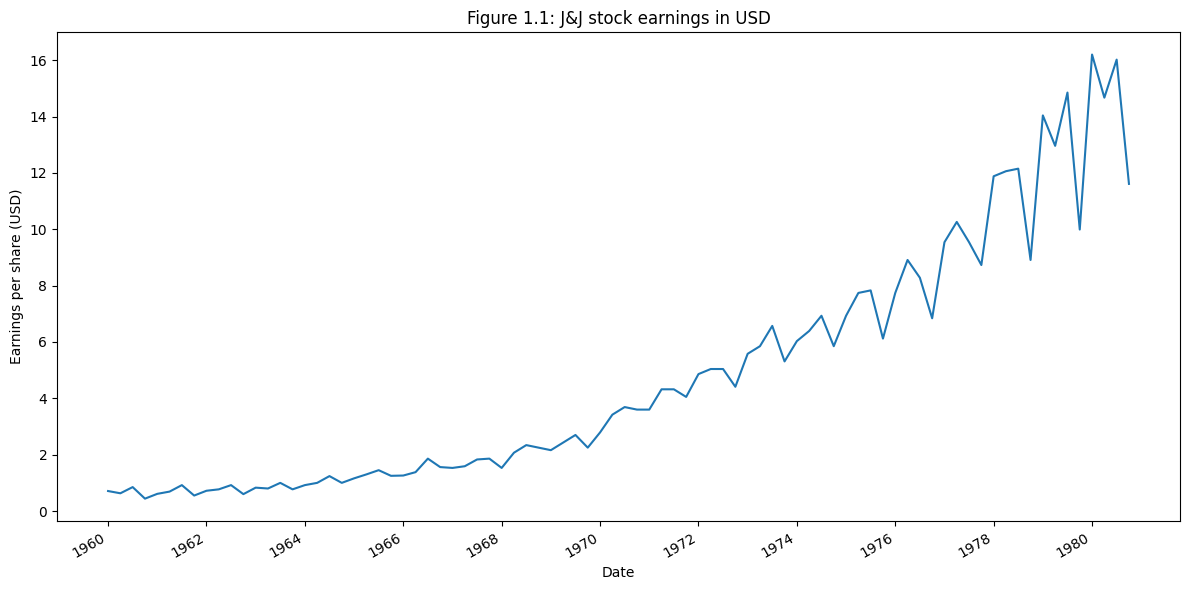

In [ ]:
# Creating a plot to visualize the earnings per share over time
fig, ax = plt.subplots(figsize=(12,6))

# Plotting the time series data
ax.plot(df.date, df.data)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.set_title('Figure 1.1: J&J stock earnings in USD')

# Setting custom x-ticks for better readability
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# Auto-formatting the date labels
fig.autofmt_xdate()
plt.tight_layout()

# Saving the figure
#plt.savefig('figures/CH01_F01_jj.png', dpi=300)


> Figure 1.1 represents a time series data with an increasing trend over time. The data is indexed by time and is equally spaced (recorded at the end of every quarter of each year). We can see that the earnings go up and down over the course of each year and the pattern is repeated every year.

## Components of a time series
---
The decomposition of a time series allows us to better understand the components of a dataset. By visually analyzing the trend, seasonal, and residuals of a time series, we can gain insight into the patterns and trends that may not be apparent from just looking at the dataset.

In [ ]:
# Performing STL decomposition on the time series data
advanced_decomposition = STL(df.data, period=4).fit()


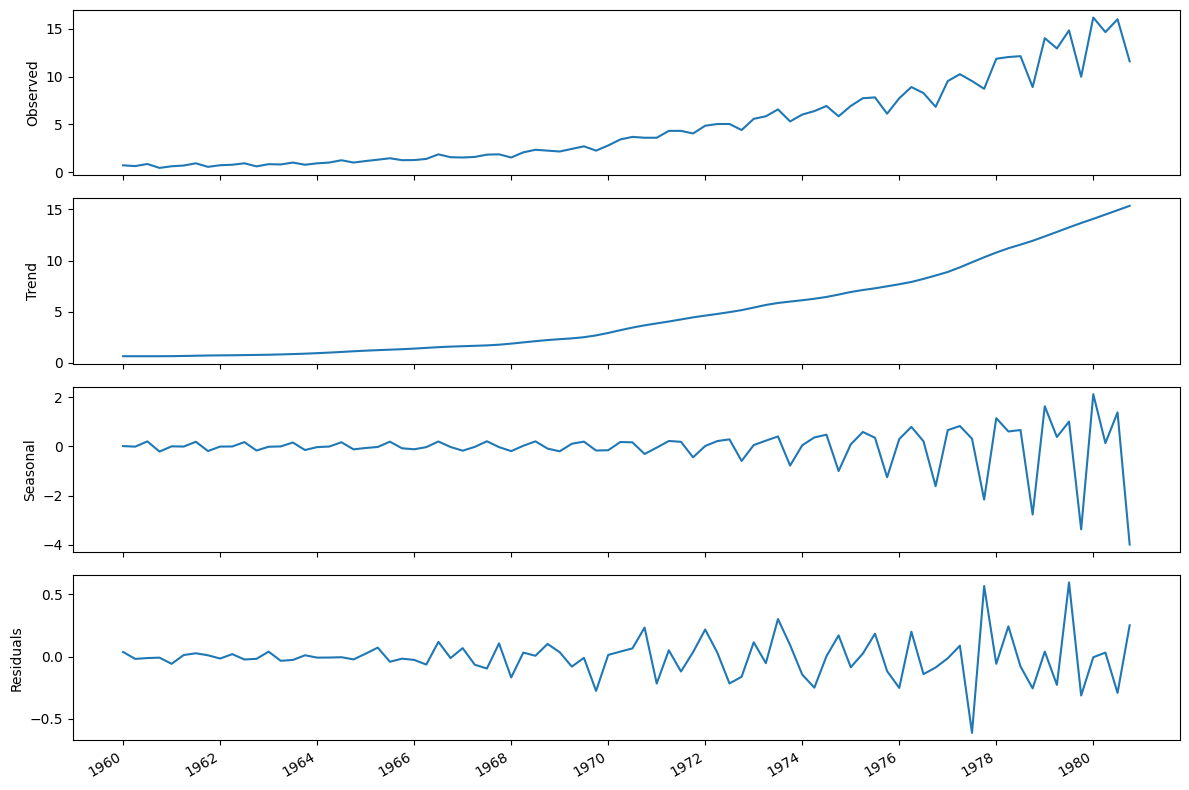

In [ ]:
# Creating subplots for each component of the time series decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12,8))

# Plotting the observed (actual) data
ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

# Plotting the trend component
ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

# Plotting the seasonal component
ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

# Plotting the residual component
ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')

# Setting custom x-ticks for better readability
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# Auto-formatting the date labels and adjusting the layout
fig.autofmt_xdate()
plt.tight_layout()

# Saving the figure
#plt.savefig('figures/CH01_F02_jj.png', dpi=300)


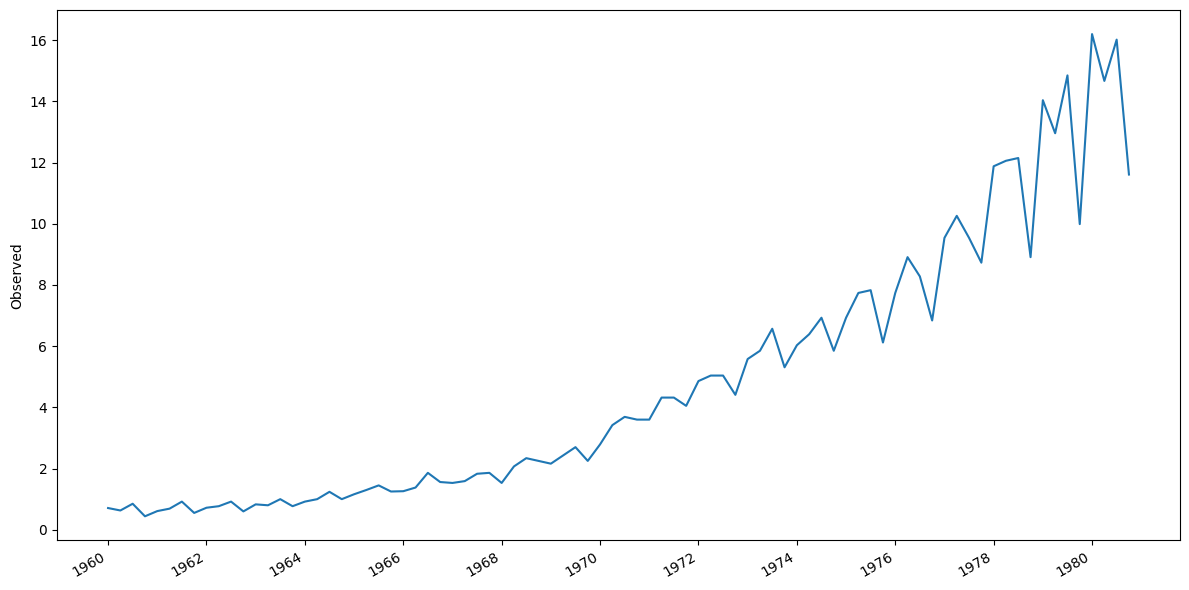

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(advanced_decomposition.observed)
ax.set_ylabel('Observed')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('figures/CH01_F03_jj.png', dpi=300)

> The chart explains that the data is first represented in a graph labeled **"Observed"**  which shows the actual time series data as recorded. The y-axis shows the value of the quarterly earnings per share for Johnson & Johnson in US dollars, while the x-axis represents time. This graph is a combination of the Trend, Seasonal, and Residuals graphs.



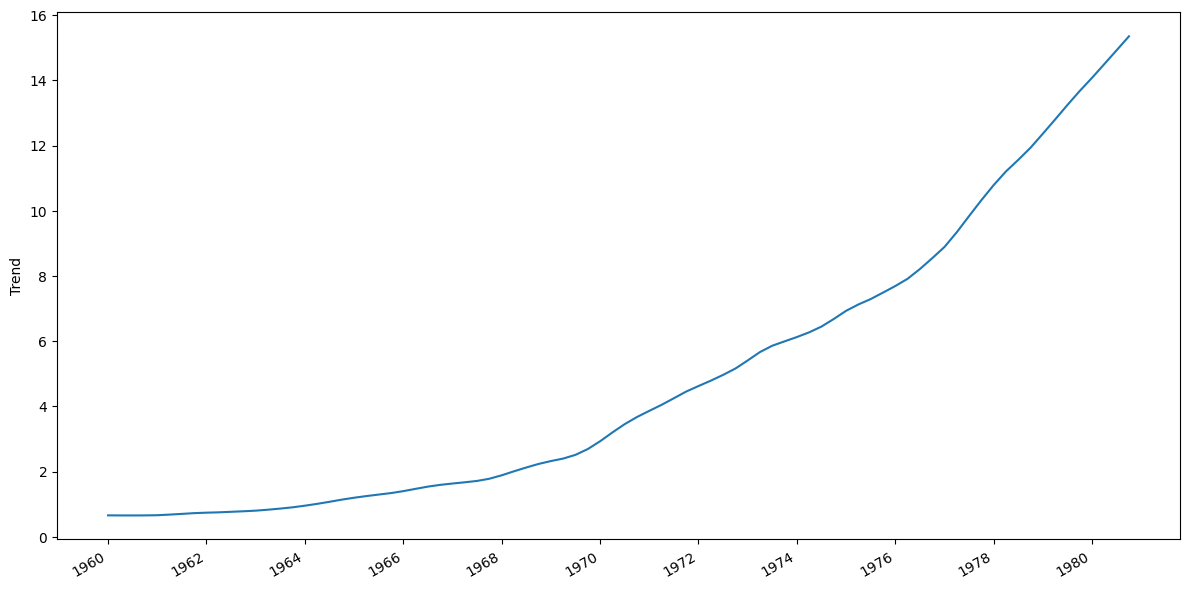

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(advanced_decomposition.trend)
ax.set_ylabel('Trend')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('figures/CH01_F04_peixeiro.png', dpi=300)

> **The trend component** is defined as the slow-moving changes in a time series and can be thought of as trying to draw a line through most of the data points to show the general direction of the time series. In the example provided, the trend starts out flat and then steeply goes up, indicating a positive trend.



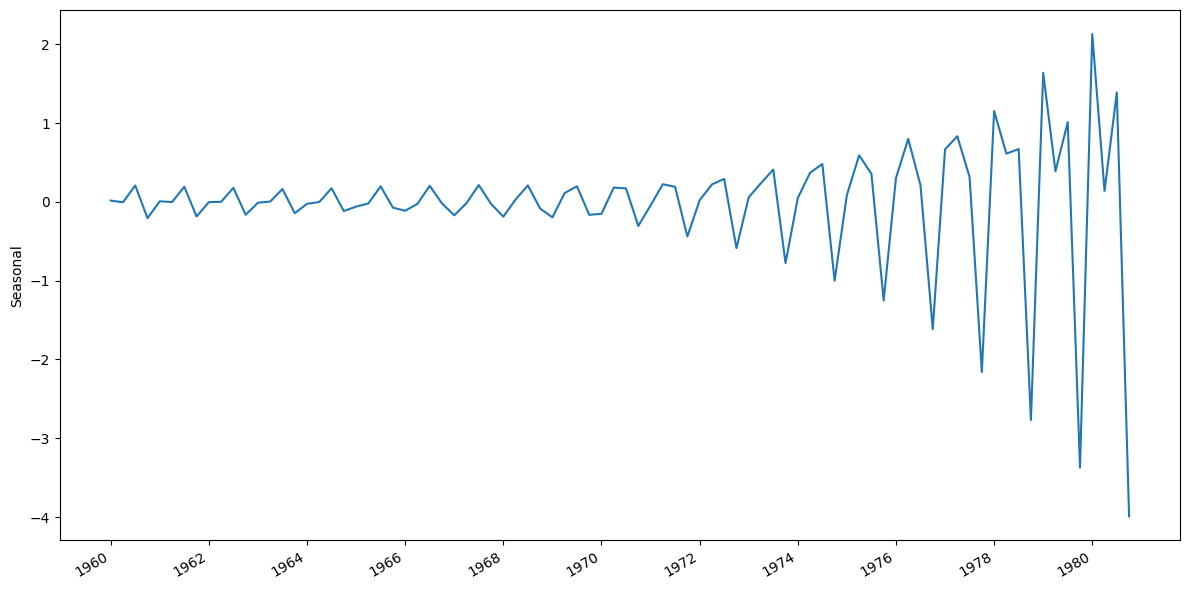

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(advanced_decomposition.seasonal)
ax.set_ylabel('Seasonal')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('figures/CH01_F05_peixeiro.png', dpi=300)

> **The seasonal component** captures the seasonal variation, which is a cycle that occurs over a fixed period of time. In the example, it is shown that over the course of a year or four quarters, the earnings per share start low, increase, and decrease again at the end of the year. The text also notes that negative values on the y-axis do not indicate negative earnings per share, but rather how the data deviates from the trend.



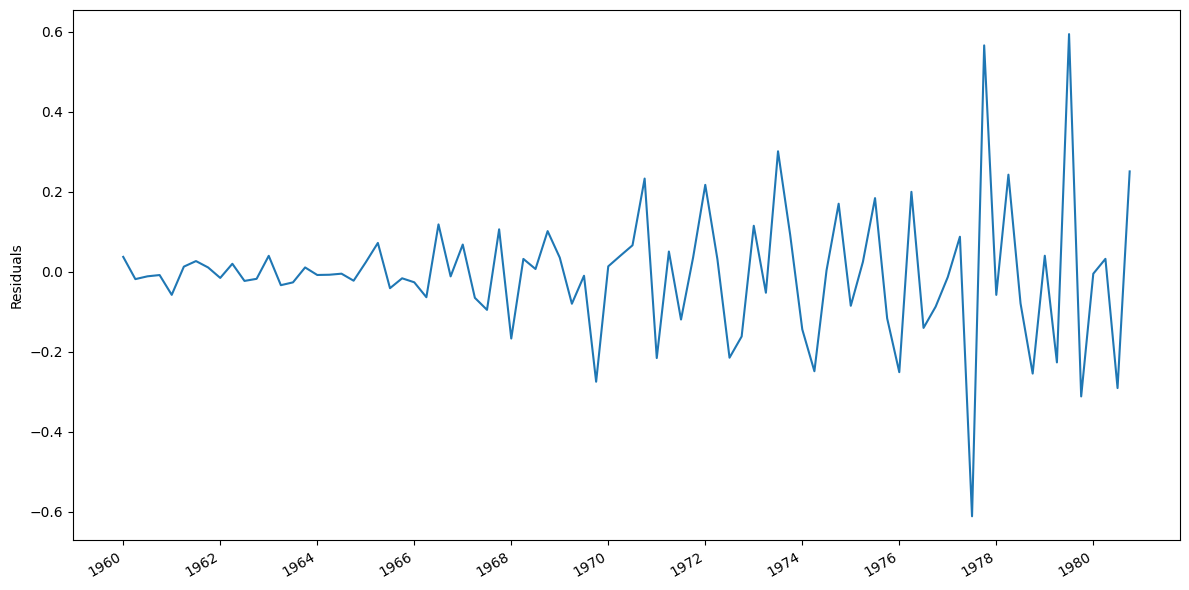

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(advanced_decomposition.resid)
ax.set_ylabel('Residuals')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('figures/CH01_F06_peixeiro.png', dpi=300)

> Finally, the residual component is what cannot be explained by either the trend or seasonal components. It represents the adjustments that must be made to the trend and seasonal components in order to match the observed data. The residuals usually correspond to random errors or white noise and represent information that cannot be modeled or predicted.

## Time series decomposition


Time series decomposition is a process by which we separate a time series into its components: trend, seasonality, and residuals.


*  The trend represents the slow-moving changes in a time series. It is responsible for
making the series gradually increase or decrease over time.

*  The seasonality component represents the seasonal pattern in the series. The cycles
occur repeatedly over a fixed period of time.

*  The residuals represent the behavior that cannot be explained by the trend and seasonality
components. They correspond to random errors, also termed white noise.

## Forecasting Roadmap

Forecasting is the process of predicting future events based on historical data and knowledge of potential future factors. As data scientists, we may be excited to create models with high accuracy, but it is important to follow certain steps before beginning the forecasting process.


> Forecasting project roadmap. The
first step is naturally to set a goal that justifies the
need for forecasting. Then you must determine
what needs to be forecast in order to achieve that
goal. Then you set the horizon of the forecast.
Once that’s done, you can gather the data and
develop a forecasting model. Then the model
is deployed to production, its performance is
monitored, and new data is collected in order
to retrain the forecasting model and make sure
it is still relevant.

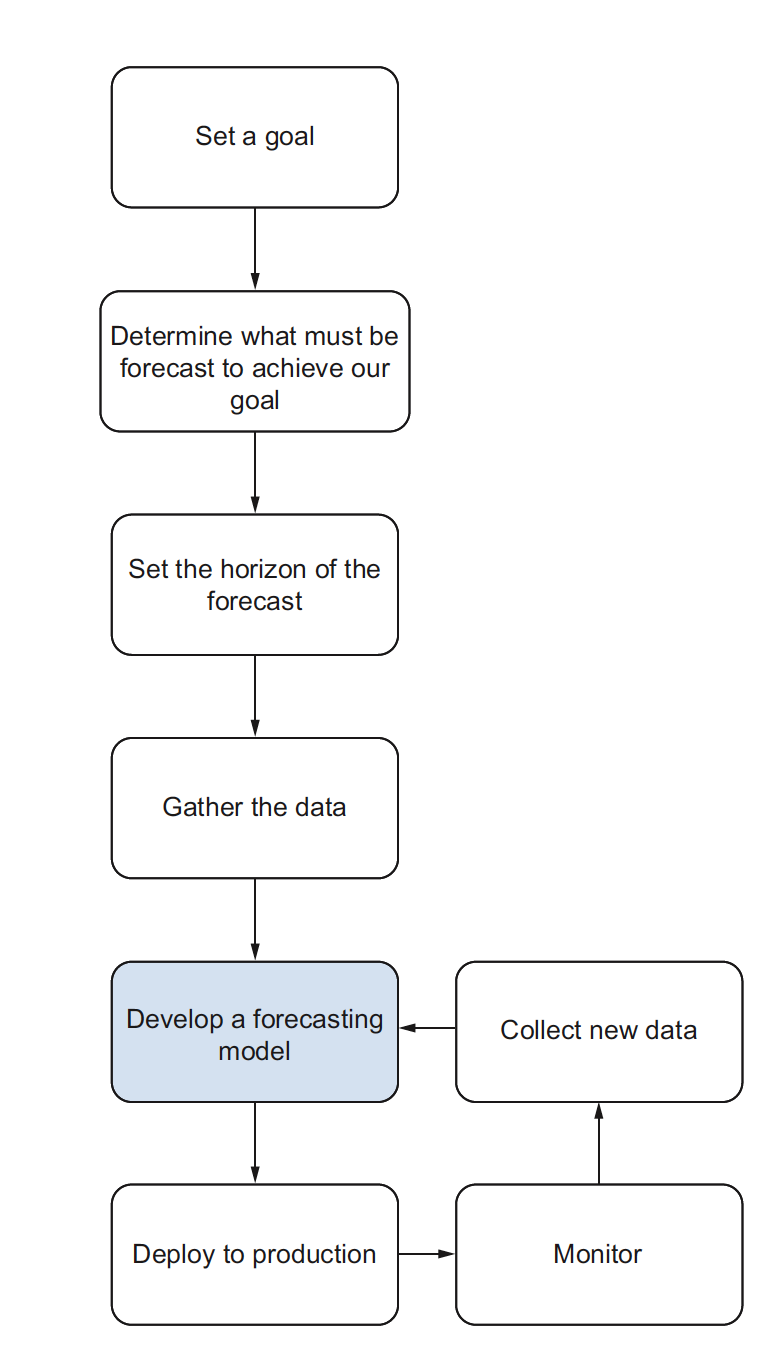

> **Setting a goal**

* The first step in any project roadmap is to set a goal. In this scenario, the goal is to determine which sleeping bag to bring for a camping trip.

> **Determining what must be forecast to achieve your goal**

* Determine what needs to be forecast in order to make a decision on which sleeping bag to bring. In this case, it is the minimum temperature at night during the camping trip.

> **Setting the horizon of the forecast**

* Set the horizon of the forecast, which is the time frame in which the prediction will be made. In this scenario, the camping trip is one month away and lasts one week, so the horizon is one week.

> **Gathering the data**

* Start gathering historical data, such as daily minimum temperature data and information on possible factors that can influence temperature, such as humidity and wind speed.
* Determine how much data is sufficient for the forecast. In this case, one year of data is enough for daily forecasts.

> **Developing a forecasting model**

* With historical data, a forecasting model is developed to study trends and patterns
* Different models may be used depending on the type of data and patterns observed, such as SARIMA for seasonal effects and SARIMAX for exogenous variables
* Neural networks can also be used with large amounts of data
* A test set is used to evaluate the model's performance and an error metric, such as MSE, is used to determine the best-performing model

> **Deploying to production**

* The chosen model is deployed to production to take in data and return predictions
* The model can be served as an API, integrated into a web application, or defined as an Excel function
* The model must be able to produce forecasts without manual manipulation of data

> **Monitoring**

* The model's performance is monitored by comparing forecasts to actual recorded data
* Unexpected events, such as heat waves, can be identified and their impact on the model's forecasts evaluated

> **Collecting new data**

* New data is collected as the model is monitored and used to retrain the model for more accurate predictions
* This process is repeated until the desired forecasting horizon is reached and a decision can be made based on the model's predictions.

Visualizing the production loop.
Once the model is in production, you enter a
cycle where you monitor it, collect new data,
and use that data to adjust the forecasting
model before deploying it again.

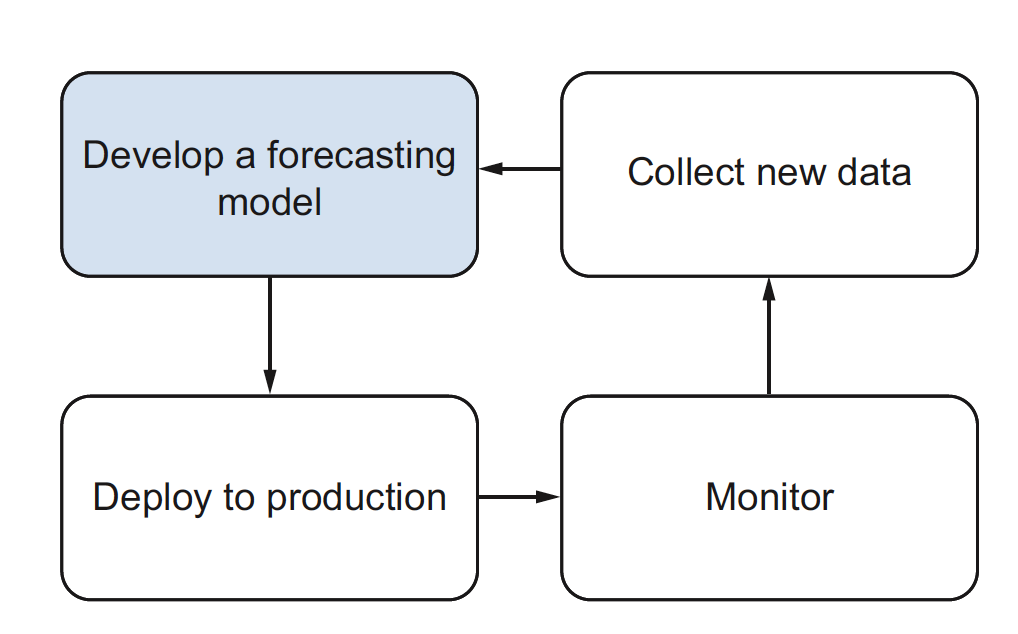

## **Summary**
* A time series is a set of data points ordered in time.
* Examples of time series are the closing price of a stock or the temperature
outside.
* Time series can be decomposed into three components: a trend, a seasonal component,
and residuals.
* It is important to have a goal when forecasting and to monitor the model once
it’s deployed. This will ensure the success and longevity of the project.
* Never change the order of a time series when modeling. Shuffling the data is
not allowed.

In [ ]:
# fig, ax = plt.subplots()

# ax.plot(df.date, df.data)
# ax.plot(advanced_decomposition.trend, color='lightgrey', linestyle='--', label='Trend')
# ax.set_xlabel('Date')
# ax.set_ylabel('Earnings per share (USD)')

# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# fig.autofmt_xdate()
# plt.tight_layout()

# plt.savefig('figures/CH01_F01_peixeiro.png', dpi=300)